# <b> Bitcoin Market Sentiment Analysis <b>

Dataset : https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing

Dataset : https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
trader_df = pd.read_csv('/content/drive/My Drive/ds_ayush_kale/csv_files/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/My Drive/ds_ayush_kale/csv_files/fear_greed_index.csv')

In [8]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


### <i> Converting date/time columns to the correct datetime format for proper analysis and merging.

In [18]:
# Convert 'time' column to datetime objects
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')

# Extract just the date for merging
trader_df['date'] = trader_df['Timestamp'].dt.date

# Rename columns for easier access
sentiment_df.rename(columns={'Date': 'date_str', 'Classification': 'sentiment'}, inplace=True)

# Convert string date to datetime object
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['date'] = sentiment_df['date'].dt.date

In [19]:
print("Trader Data Info:")
trader_df.info()
print("\nSentiment Data Info:")
sentiment_df.info()

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float6

### <i> Lets dig into each dataset individually to understand its characteristics.

/tmp/ipython-input-1341229488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=sentiment_df, palette=['#C84B31', '#2D767F'])
/tmp/ipython-input-1341229488.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='classification', data=sentiment_df, palette=['#C84B31', '#2D767F'])


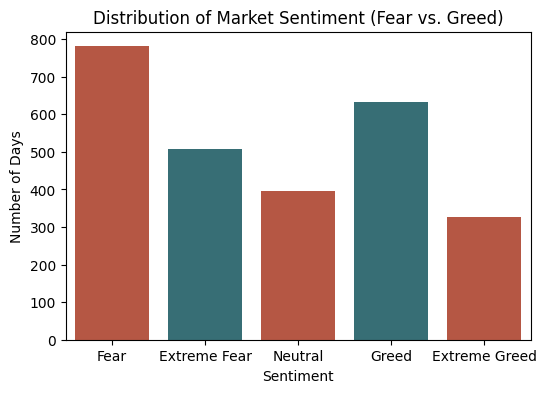

In [27]:
# Sentiment Data
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=sentiment_df, palette=['#C84B31', '#2D767F'])
plt.title('Distribution of Market Sentiment (Fear vs. Greed)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Days')
# Remember to save this to your outputs/ folder! [cite: 18, 23]
plt.savefig('/content/drive/My Drive/ds_ayush_kale/outputs/sentiment_distribution.png')
plt.show()

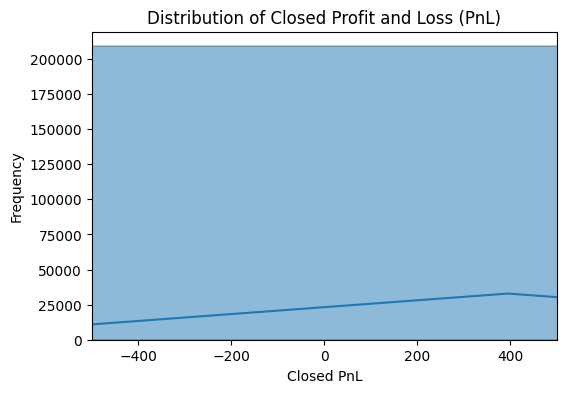

In [28]:

# Trader Data
plt.figure(figsize=(6,4))
sns.histplot(trader_df['Closed PnL'], bins=100, kde=True)
plt.title('Distribution of Closed Profit and Loss (PnL)')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.xlim(-500, 500) # Limiting x-axis to see the distribution more clearly
plt.savefig('/content/drive/My Drive/ds_ayush_kale/outputs/pnl_distribution.png')
plt.show()

### <i> merging the two datasets on the 'date' column

In [29]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')

In [30]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


/tmp/ipython-input-981694407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Fee', data=leverage_by_sentiment, palette=['#C84B31', '#2D767F'])
/tmp/ipython-input-981694407.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='classification', y='Fee', data=leverage_by_sentiment, palette=['#C84B31', '#2D767F'])


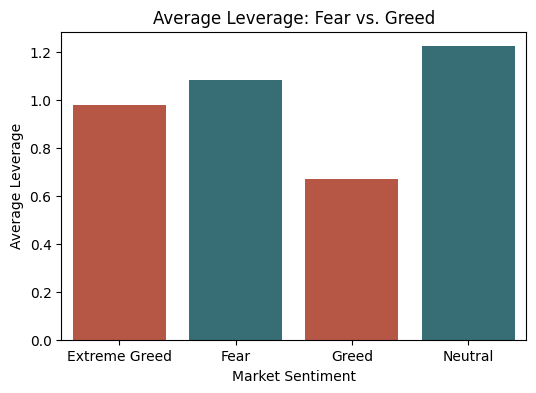

In [34]:
leverage_by_sentiment = merged_df.groupby('classification')['Fee'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='Fee', data=leverage_by_sentiment, palette=['#C84B31', '#2D767F'])
plt.title('Average Leverage: Fear vs. Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Leverage')
plt.savefig('/content/drive/My Drive/ds_ayush_kale/outputs/leverage_vs_sentiment.png')
plt.show()

/tmp/ipython-input-22191558.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='counts', y='Direction', hue='classification', data=event_counts, palette=['#C84B31', '#2D767F'])


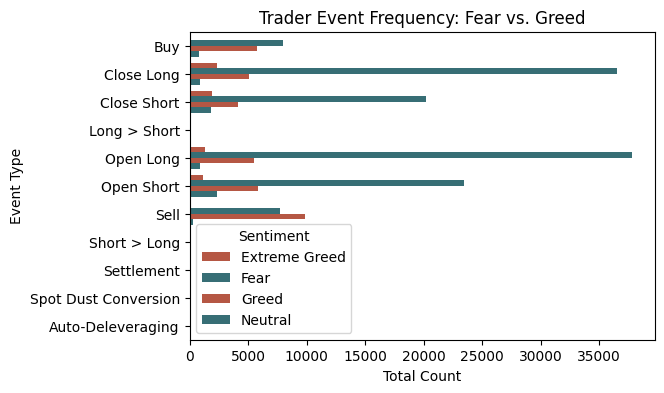

<Figure size 640x480 with 0 Axes>

In [41]:
# Group by sentiment and event, then count occurrences
event_counts = merged_df.groupby(['classification', 'Direction']).size().reset_index(name='counts')

plt.figure(figsize=(6,4))
sns.barplot(x='counts', y='Direction', hue='classification', data=event_counts, palette=['#C84B31', '#2D767F'])
plt.title('Trader Event Frequency: Fear vs. Greed')
plt.xlabel('Total Count')
plt.ylabel('Event Type')
plt.legend(title='Sentiment')
plt.show()
plt.savefig('/content/drive/My Drive/ds_ayush_kale/outputs/event_frequency.png')

## <b> <t> Model Development - random forest Classification

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [45]:
print(sentiment_df.columns.tolist())
print(trader_df.columns.tolist())

['timestamp', 'value', 'classification', 'date']
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date']


In [46]:
# Select features and target
# Exclude columns that are directly related to the target or are identifiers
features = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
X = merged_df[features]
y = merged_df['classification']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nPrecision Score (Macro):")
print(precision_score(y_test, y_pred, average='macro'))

Classification Report:
               precision    recall  f1-score   support

Extreme Greed       0.93      0.81      0.87      1337
         Fear       0.95      0.98      0.96     26929
        Greed       0.92      0.83      0.87      7167
      Neutral       0.89      0.84      0.86      1420

     accuracy                           0.94     36853
    macro avg       0.92      0.86      0.89     36853
 weighted avg       0.94      0.94      0.94     36853


Confusion Matrix:
[[ 1080   162    52    43]
 [    8 26440   422    59]
 [   46  1144  5932    45]
 [   26   153    54  1187]]

Precision Score (Macro):
0.9217025132172669
